In [2]:
# 라이브러리 불러오기
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# matplotlib 스타일 중, 'seaborn' 스타일 사용
plt.style.use('seaborn')

#데이터 불러오기
test_dt = pd.read_csv('titanic/test.csv')
train_dt = pd.read_csv('titanic/train.csv')
gender_dt = pd.read_csv('titanic/gender_submission.csv')

In [18]:
# 데이터 확인하기
train_dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# na값 확인하기
# 열마다 확인하면서 na값이 몇개인지 보여준다.
print(train_dt.apply(lambda x : pd.isna(x).sum()))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [24]:
# na 비율 구하기 (소수점 2자리까지 나타내기)
# shape[0]--> 인 이유는 row갯수
print(round(train_dt.apply(lambda x : pd.isna(x).sum())/train_dt.shape[0]*100 , 2))

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


In [25]:
# 기초통계량 구하기
train_dt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
# null값 개수와 타입보기 ! !
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
# y값(survived)에 대한 분포 
train_dt["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [47]:
train_dt.groupby(['Pclass', 'Survived'])['Pclass'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

In [69]:
train_dt['Age_cut'] = 0
train_dt['Age_cut'] = pd.cut(train_dt['Age'], bins=[0, 19, 29, 39, 49, 59, 69, 80],
                            labels=['10s','20s', '30s', '40s', '50s', '60s', '70over'])

In [82]:
train_dt.groupby(['Age_cut', 'Survived'])['Survived'].count()

Age_cut  Survived
10s      0            85
         1            79
20s      0           143
         1            77
30s      0            94
         1            73
40s      0            55
         1            34
50s      0            28
         1            20
60s      0            13
         1             6
70over   0             6
         1             1
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

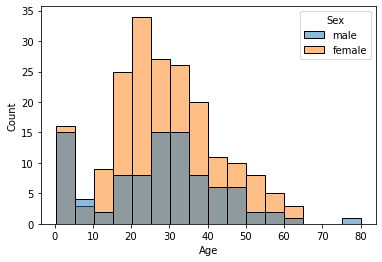

In [105]:
import seaborn as sns

sns.histplot(x=train_dt[train_dt['Survived']==1]['Age'], hue='Sex', data=train_dt)

# 머신러닝하기

참고 페이지 : https://www.kaggle.com/subinium/subinium-tutorial-titanic-beginner

In [10]:
# 라이브러리 불러오기
import numpy as np 
import pandas as pd

#데이터 불러오기
test_dt = pd.read_csv('titanic/test.csv')
train_dt = pd.read_csv('titanic/train.csv')

## 전처리

NaN 데이터를 최대한 메꾸고 분석하자 ! 
보통 대푯값, 중앙값으로 메꾼다. 

먼저 불필요한 column을 drop 해준다

In [11]:
# 못쓰는 열 drop 해주기
    # : passengerID(탑승객의 아이디를 나타낸거니까), Cabin(객실인데  Nan값이 대부분)
train_dt.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)
    # axis=1 : 열로 적용, inplace=True : 변수 지정 할 필요 없이 train_dt에 바로 적용시켜

print(train_dt.head())

   Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked  
0    male  22.0      1      0         A/5 21171   7.2500        S  
1  female  38.0      1      0          PC 17599  71.2833        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S  
3  female  35.0      1      0            113803  53.1000        S  
4    male  35.0      0      0            373450   8.0500        S  


In [12]:
# test 데이터도 적용
# test 데이터에서는 제출하는 파일이 'PassengerId'가 index 칼럼과 같은거라서 지워주지 않는다.
# 예) (passnegerid가) 1번 사람이 살았니 ? 를 예측해야하니까
test_dt.drop(['Cabin'], axis=1, inplace=True)
print(test_dt.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Embarked  
0  34.5      0      0   330911   7.8292        Q  
1  47.0      1      0   363272   7.0000        S  
2  62.0      0      0   240276   9.6875        Q  
3  27.0      0      0   315154   8.6625        S  
4  22.0      1      1  3101298  12.2875        S  


In [13]:
# 현재는 'Name'과 'Ticket' 변수 필요 없으니까 버리기
train_dt.drop(['Name', 'Ticket'], axis=1, inplace=True)
test_dt.drop(['Name', 'Ticket'], axis=1, inplace=True)

### One-Hot Encoding : 문자를 숫자로 바꾸어주는 방법 중 하나
가변수로 만들어주는 것인데, 0과 1로 이루어진 열을 나타낸다.

'1은 있다, 0은 없다'를 뜻한다.

In [14]:
#get_dummies 함수를 이용하여 카테고리를 변수로 만들기
pclass_train_dummies = pd.get_dummies(train_dt['Pclass'])

# 합치기
train = train_dt.join(pclass_train_dummies)

# 다중공선성을 피하기 위해서  'Pclass' 열 지우기 ('Pclass'랑 연관성 엄청 있으니까. 독립적인 변수가 못됨. 나중 모델 만들때 지장있음)
train.drop(['Pclass'], axis=1, inplace=True)

print(train.head())

   Survived     Sex   Age  SibSp  Parch     Fare Embarked  1  2  3
0         0    male  22.0      1      0   7.2500        S  0  0  1
1         1  female  38.0      1      0  71.2833        C  1  0  0
2         1  female  26.0      0      0   7.9250        S  0  0  1
3         1  female  35.0      1      0  53.1000        S  1  0  0
4         0    male  35.0      0      0   8.0500        S  0  0  1


In [15]:
# 테스트 데이터도 적용
pclass_test_dummies = pd.get_dummies(test_dt['Pclass'])
test = test_dt.join(pclass_test_dummies)
test.drop(['Pclass'], axis=1, inplace=True)
print(test.head())

   PassengerId     Sex   Age  SibSp  Parch     Fare Embarked  1  2  3
0          892    male  34.5      0      0   7.8292        Q  0  0  1
1          893  female  47.0      1      0   7.0000        S  0  0  1
2          894    male  62.0      0      0   9.6875        Q  0  1  0
3          895    male  27.0      0      0   8.6625        S  0  0  1
4          896  female  22.0      1      1  12.2875        S  0  0  1


이렇게 Pclass의 원본을 없애고, 범주형으로 개별로 데이터가 변환되었다.

In [16]:
# 이렇게 train 적용한 뒤, test도 적용시켜주는게 귀찮다 ! 그러면 사용자정의함수 만들어서 적용

# def preprocessing(df, is_train = True) :
#     if is_train :
#         df.drop(["PassengerId", "Cabin"], axis=1, inplace=True)
#     else :
#         df.drop(["Cabin"], axis=1, inplace=True)
#     dummy = pd.get_dummies(df["Pclass"])
#     df = df.join(dummy)
#     df.drop("Pclass", axis = 1, inplace = True)

#     return df

# train = preprocessing(train, is_train = True)
# test = preprocessing(test, is_train = False)
# print(train.columns)
# print(test.columns)

### 'Age'의 NaN값 채우기

나이는 연속형 데이터이다. 큰 처리가 필요없다.(카테고리화를 하여 일부 알고리즘에서 더 유용한 결과를 만들 수 있음) 하지만 일부 NaN 데이터가 있으니 이를 채울 수 있는 방법은
1. 랜덤
2. 평균값 
3. 중간값
4. 데이터 버리기 

이렇게 있는데 평균값으로 채워주자 ! 

* na값을 drop해버리면 그만큼 테스트나 트레인해주는 데이터를 날리는 것이기 때문에 막 날리면 안됨. Na값을 바꿔주는것이 제일 좋다. 최후의 방법이 drop하는것.

In [17]:
# 평균값으로 채운다
train['Age'].fillna(train['Age'].mean(), inplace=True)

# na값 있는지 확인
print(sum(pd.isna(train['Age'])))

0


In [18]:
# test에도 적용
test['Age'].fillna(test['Age'].mean(), inplace=True)

print(sum(pd.isna(test['Age'])))

0


### 'Fare' 탑승료 

test셋에 1개의 데이터가 비어있다.
무단 탑승이라고 가정하고 0이라고 입력. (디카프리오라고 추측할 수 있다)

In [19]:
test['Fare'].fillna(0, inplace=True)

### 'Embarked' 탑승항구. 

카테고리형식. NaN값들을 최빈값으로 바꾼다.

In [20]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

S가 대다수이므로 이걸로 바꿔주는 것이 이상치 영향 덜 받을 것이다.(최빈값으로 매꿔주기) 

In [22]:
# NaN값 S로 바꿔주기
train['Embarked'].fillna('S', inplace=True)
test['Embarked'].fillna('S', inplace=True)

In [23]:
# one-hot-encoding
embarked_train_dummies = pd.get_dummies(train['Embarked'])

embarked_train_dummies.columns=['S', 'C', 'Q'] # column 이름 주기.ㅗ

train.drop(['Embarked'], axis=1, inplace=True)

train = train.join(embarked_train_dummies)

print(train.head())

   Survived     Sex   Age  SibSp  Parch     Fare  1  2  3  S  C  Q
0         0    male  22.0      1      0   7.2500  0  0  1  0  0  1
1         1  female  38.0      1      0  71.2833  1  0  0  1  0  0
2         1  female  26.0      0      0   7.9250  0  0  1  0  0  1
3         1  female  35.0      1      0  53.1000  1  0  0  0  0  1
4         0    male  35.0      0      0   8.0500  0  0  1  0  0  1


In [24]:
# test 데이터에도 적용
embarked_test_dummies = pd.get_dummies(test['Embarked'])
embarked_test_dummies.columns=['S', 'C', 'Q']
test.drop(['Embarked'], axis=1, inplace=True)
test = test.join(embarked_test_dummies)
print(test.head())

   PassengerId     Sex   Age  SibSp  Parch     Fare  1  2  3  S  C  Q
0          892    male  34.5      0      0   7.8292  0  0  1  0  1  0
1          893  female  47.0      1      0   7.0000  0  0  1  0  0  1
2          894    male  62.0      0      0   9.6875  0  1  0  0  1  0
3          895    male  27.0      0      0   8.6625  0  0  1  0  0  1
4          896  female  22.0      1      1  12.2875  0  0  1  0  0  1


### 'Sex' 성별

남, 여로 나뉘니 one-hot-encoding을 해준다.

In [25]:
# one-hot-encoding 해주기
sex_train_dummies = pd.get_dummies(train['Sex'])

train = train.join(sex_train_dummies)

train.drop(['Sex'], axis=1, inplace=True)

print(train.head())

     Survived        Age  SibSp  Parch     Fare  1  2  3  S  C  Q  female  \
0           0  22.000000      1      0   7.2500  0  0  1  0  0  1       0   
1           1  38.000000      1      0  71.2833  1  0  0  1  0  0       1   
2           1  26.000000      0      0   7.9250  0  0  1  0  0  1       1   
3           1  35.000000      1      0  53.1000  1  0  0  0  0  1       1   
4           0  35.000000      0      0   8.0500  0  0  1  0  0  1       0   
..        ...        ...    ...    ...      ... .. .. .. .. .. ..     ...   
886         0  27.000000      0      0  13.0000  0  1  0  0  0  1       0   
887         1  19.000000      0      0  30.0000  1  0  0  0  0  1       1   
888         0  29.699118      1      2  23.4500  0  0  1  0  0  1       1   
889         1  26.000000      0      0  30.0000  1  0  0  1  0  0       0   
890         0  32.000000      0      0   7.7500  0  0  1  0  1  0       0   

     male  
0       1  
1       0  
2       0  
3       0  
4       1  
.. 

In [26]:
# test도 적용시키기
sex_test_dummies = pd.get_dummies(test['Sex'])
test = test.join(sex_test_dummies)
test.drop(['Sex'], axis=1, inplace=True)
print(test.head())

   PassengerId   Age  SibSp  Parch     Fare  1  2  3  S  C  Q  female  male
0          892  34.5      0      0   7.8292  0  0  1  0  1  0       0     1
1          893  47.0      1      0   7.0000  0  0  1  0  0  1       1     0
2          894  62.0      0      0   9.6875  0  1  0  0  1  0       0     1
3          895  27.0      0      0   8.6625  0  0  1  0  0  1       0     1
4          896  22.0      1      1  12.2875  0  0  1  0  0  1       1     0


## 데이터 나누기
학습용 데이터를 위해 데이터를 나누어야한다.


x = 독립 변수들

y = 종속 변수



In [27]:
x_train = train.drop(['Survived'], axis=1)
y_train = train['Survived']

# x_test는 있지만 결과는 아직 모르니 y_test 없다.(우리가 예측해야지)
# 모델에서는 'PassengerId' 상관없기 때문에 버려준다.
x_test = test.drop(['PassengerId'], axis=1)

## 머신러닝 알고리즘 적용하기

In [28]:
# 라이브러리 불러오기 : 로지스틱 회귀
from sklearn.linear_model import LogisticRegression 

### 모델 피팅 시키기

#### LogisticRegression

In [29]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# x라는 것을 가지고 y값을 얼마나 맞췄는지 점수
print(logreg.score(x_train, y_train))

0.8058361391694725


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# train한 것을 가지고 y_test값을 예측한다.
# 정답제출
y_pred = logreg.predict(x_test)

#### Support Vector Machines

In [32]:
from sklearn.svm import SVC, LinearSVC

svc = SVC()

svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

svc.score(x_train, y_train)

0.6868686868686869

#### Random Forests

In [33]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100) # 나무의수=100

random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)

random_forest.score(x_train, y_train)

0.9820426487093153

#### KNeighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

knn.score(x_train, y_train)

0.835016835016835

--> 이를 통해 랜덤 포레스트가 가장 좋은 결과를 내는 것을 알 수 있다.

### 제출용 파일 만들기

In [35]:
random_forest = RandomForestClassifier(n_estimators = 100) # 나무의수=100
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)

0.9820426487093153

In [38]:
submission = pd.DataFrame({
    "PassengerId" : test["PassengerId"],
    "Survived" : y_pred
})
submission.to_csv('titanic.csv', index=False)